<a href="https://colab.research.google.com/github/Wipada6430205202/data_warehouse/blob/main/Project1(%E0%B8%82%E0%B9%89%E0%B8%AD%203)_66.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Analytics

<img src="https://www.datanami.com/wp-content/uploads/2014/06/text-analytics.png" width="300">

## Due Date: Sunday, October 1, 2023
<br>
<span style="color:red">NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!</span>

## List team members:

1. <Name> <ID> <Email>
2. <Name> <ID> <Email>
3. <Name> <ID> <Email>

**NOTE1**: Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost

**NOTE2**: Create a slide presentation once finished, convert to pdf format, and turn in by one group member only
<br>A list of documents to turn in: 1) Jupyter notebook containing results and 2) A set of slides in pdf format

In [ ]:
# Load these libraries
import json
import pprint
import pandas as pd
from io import StringIO # using StringIO to prevent ValueError
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import urllib.request

import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1: Working with Twitter Data and JSON file

We are working with a Twitter dataset in JSON format from `thailand_tweets.txt`.<br>
The tweets were scraped using "Thailand" keyword on August 31, 2022.<br>
We are going to examine the dataset and retrieve information from the JSON file.
Most Twitter datasets provide only Tweet ID where we can retrieve tweets from tweet ID as follow.
```
twitter.com/anyuser/status/<tweet_id>
```

#### Read JSON file

In [ ]:
# read the file


In [ ]:
# inspect the file


#### Pretty print json/dict object

Possible approaches:
* In fact, `pandas` has `pandas.read_json(<file_dir>)` function to read json file into dataframe
* As we create a data dict, we can also read our data dict into a pandas dataframe

### Your report
* The total number of tweets collected in the file:
* The content of the first tweet:
* Is the first tweet contained any hashtags or mentions?
* Collect all hashtags related to Thailand from this data
* Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts
    * You are free to define your own popularity metric
* Display the top 5 tweets that are the most popular among your collection
* Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

In [ ]:
# ----------------- Your code here -----------------



Note: ไม่ต้องรายงานส่วนนี้ในสไลด์

## Problem 2 Study Trip Advisor Hotel Reviews Sentiment

We are working with the Trip Advisor Hotel Reviews dataset. You can see the source from https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews.

* Analyze the data to find out what make a hotel good or bad
<br>You may create a tag of "positive", "negative", or "neural" sentiment first. After tagging each tweet with different sentiment, we can separate positive tweets and negative tweets. Then, it is easier to find our common patterns in positive tweets or good hotels, and vice versa.

In [ ]:
#----------------------------------------------
# Your code starts here
# label each tweet as positive, negative, and neural sentiment
# combine tweet texts in each type
# tokenize texts
# convert to lower case
# remove stop words
# remove any other stop words, like RT
# remove punctuations
# remove other symbols?
# analyze word frequency in each sentiment type and so on
# create some data visualization for the analysis and your presentation





### Report
* How did you analyze the data?
* What did you find in the data? (please include figures or tables in the report, but no source code)

## Problem 3 Collect and Analyze Your Interesting Topic

* Select a topic that your group members are interested
* Gather url from at least 3 webpages
* Use urllib.request to retrieve data from webpage
* Clean and find intersting patterns and information
* Create a word cloud of your topic

#Topic "Chocolate"

In [2]:
#----------------------------------------------
# Your code starts here
!pip install nltk
import nltk
import urllib.request

In [3]:
chocolate_health =  urllib.request.urlopen('https://newsinhealth.nih.gov/2021/02/chocolate-health-claims')
chocolate_medical =  urllib.request.urlopen('https://www.medicalnewstoday.com/articles/270272')
chocolate_benefits =  urllib.request.urlopen('https://www.healthline.com/nutrition/7-health-benefits-dark-chocolate')



choco_health = chocolate_health.read()
choco_medical= chocolate_medical.read()
choco_benefits = chocolate_benefits.read()

In [4]:

#ดึงข้อมูลจาก html

from bs4 import BeautifulSoup
choco_health_soup= BeautifulSoup(choco_health,'html5lib')
choco_health_text = choco_health_soup.getText(strip=True)

from bs4 import BeautifulSoup
choco_medical_soup = BeautifulSoup(choco_medical,'html5lib')
choco_medical_text= choco_medical_soup.getText(strip=True)

from bs4 import BeautifulSoup
choco_benefits_soup = BeautifulSoup(choco_benefits,'html5lib')
choco_benefits_text = choco_benefits_soup.getText(strip=True)

##Tokens

In [5]:
# Tokenize Texts

Tokens_health =  [t for t in choco_health_text.split()]
Tokens_medical =  [t for t in choco_medical_text.split()]
Tokens_benefits =  [t for t in choco_benefits_text.split()]

In [6]:
# convert to lower case
lower_CHC = choco_health_text.lower()
lower_ROC = choco_medical_text.lower()
lower_BOC = choco_benefits_text.lower()

##Stop Words

### Custom stop words

In [7]:
# Custom stop words
#ต้องแก้
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
R_health = stopwords.words('english')
R_medical = stopwords.words('english')
R_benefits = stopwords.words('english')
print(len(R_health))

# add multiple words
R_health.extend(['people','much','manny','your'])
R_medical.extend(['doctor','thay','also','could'])
R_benefits.extend(['that','your','also'])
print(len(R_health))


179
185


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###Remove StopWord

In [8]:
clean_tokens_health = Tokens_health[:]
# remove stop words
for token in Tokens_health :
    if token in stopwords.words('english'):
        clean_tokens_health.remove(token)

clean_tokens_medical = Tokens_medical[:]
# remove stop words
for token in Tokens_medical :
    if token in stopwords.words('english'):
        clean_tokens_medical.remove(token)

clean_tokens_benefits = Tokens_benefits[:]
# remove stop words
for token in Tokens_benefits :
    if token in stopwords.words('english'):
        clean_tokens_benefits.remove(token)

In [9]:
def remove_less_than_3(inputs): #เอาคำที่น้อยกว่า 3 คำออกและให้มีไม่เกิน 18 คำ
    return [item for item in inputs if (len(item) > 3) and (len(item) < 18)]

In [10]:
clean_tokenslessthan3_health = remove_less_than_3(clean_tokens_health)
clean_tokenslessthan3_medical = remove_less_than_3(clean_tokens_medical)
clean_tokenslessthan3_benefits = remove_less_than_3(clean_tokens_benefits)

##Stemming
###Count Word Frequency

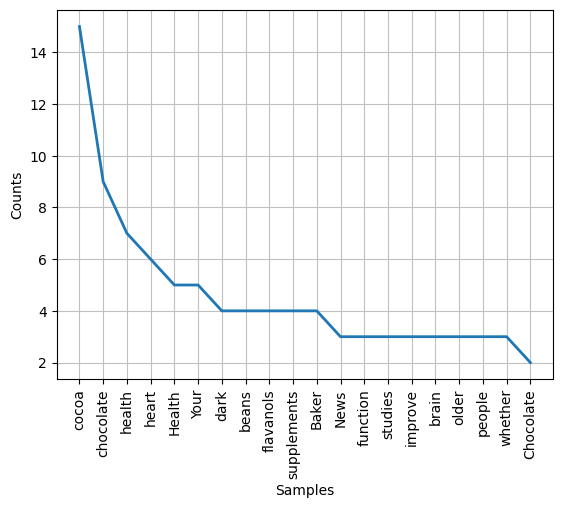

<Axes: xlabel='Samples', ylabel='Counts'>

In [11]:
f_health = nltk.FreqDist(clean_tokenslessthan3_health)
f_health.plot(20, cumulative=False) #ต้องแก้

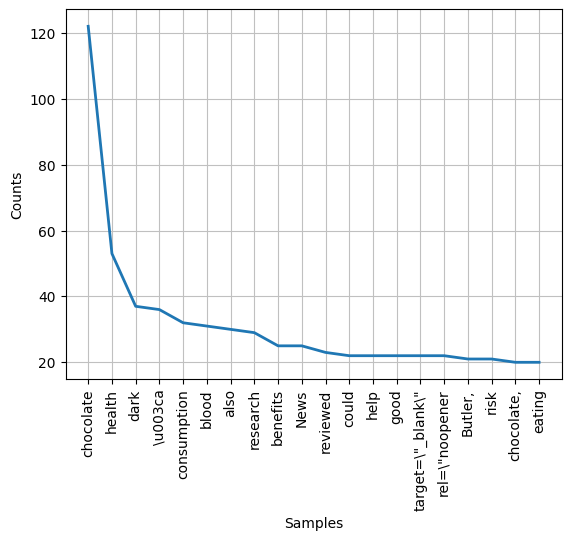

<Axes: xlabel='Samples', ylabel='Counts'>

In [14]:
f_medical= nltk.FreqDist(clean_tokenslessthan3_medical)
f_medical.plot(20, cumulative=False)

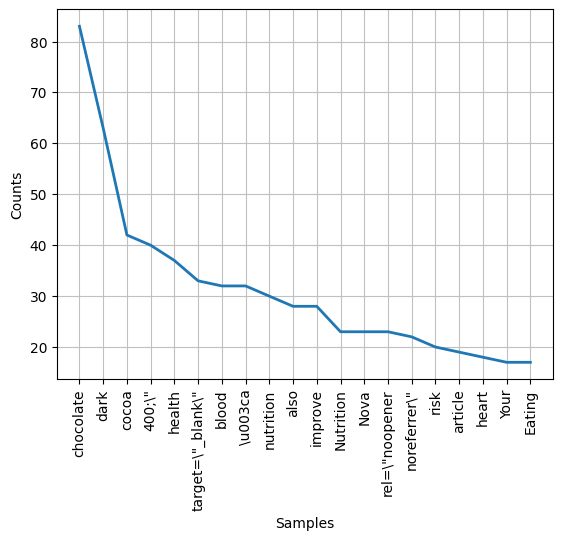

<Axes: xlabel='Samples', ylabel='Counts'>

In [16]:
f_benefits = nltk.FreqDist(clean_tokenslessthan3_benefits)
f_benefits.plot(20, cumulative=False)

In [17]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
# create an object of class PorterStemmer ต้องแก้คำบรรทัดนี้เพราะมันจะเหมือนเพื่อนเกินไป
ps = PorterStemmer()
ls = LancasterStemmer()

In [18]:
for m in clean_tokenslessthan3_health:
    clean_tokens_health_stm = ps.stem(m)

In [19]:
for m in clean_tokenslessthan3_medical:
    clean_tokens_medical_stm = ps.stem(m)

In [20]:
for m in clean_tokenslessthan3_benefits:
    clean_tokens_benefits_stm = ps.stem(m)

##Word Cloud

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

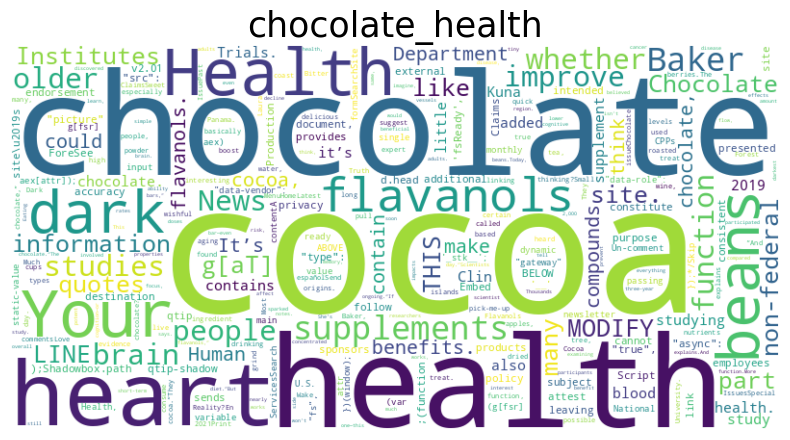

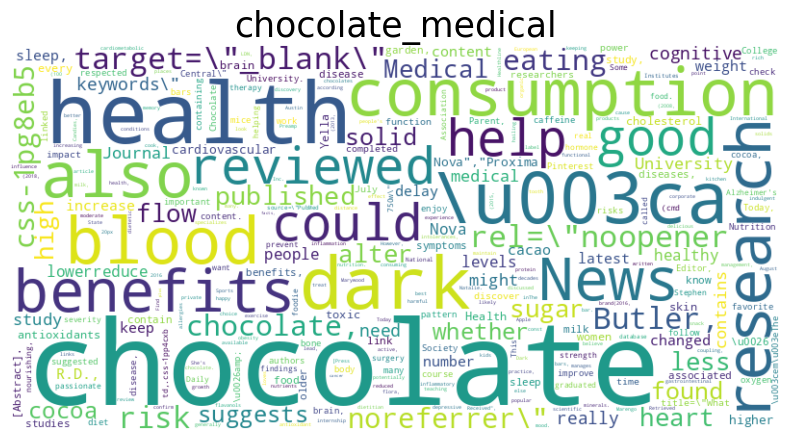

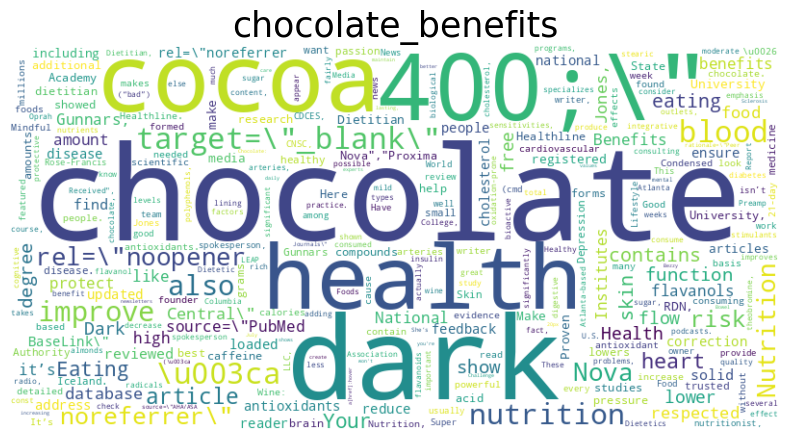

In [22]:
def generate_word_cloud(freq_dist, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white',max_words=300).generate_from_frequencies(freq_dist)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title,fontsize=25)
    plt.axis('off')
    plt.show()
generate_word_cloud(f_health, 'chocolate_health')
generate_word_cloud(f_medical, 'chocolate_medical')
generate_word_cloud(f_benefits, 'chocolate_benefits')

### Report
* What did you find out about your topic? (please include figures or tables in the report, but no source code)
  

* ในการทำหัวข้อเกี่ยวกับ Chocolate สิ่งที่สนใจมีดังนี้
   1. เมื่อกล่าวถึงช็อคโกแลตกับสุขภาพ คำที่พบมากที่สุด คือ **cocoa** ส่วนคำที่พบน้อยที่สุด คือ **chocolate**
   2. เมื่อกล่าวถึงช็อคโกแลตในทางการแพทย์ คำที่พบมากที่สุด คือ **chocolate** ส่วนคำที่พบน้อยที่สุด คือ **eating**
   3.เมื่อกล่วถึงประโยชน์ของช็อคโกแลต คำที่พบมากที่สุดคือ **chocolate** ส่วนคำที่พบน้อยที่สุดคือ **Eating**
   **ผิดแน่ๆต้องแก้แต่นี่เขียนไปก่อน**

# ☃️ The End of Project 1 ☃️